<a href="https://colab.research.google.com/github/nafis-git/data_science_path/blob/main/notebook/join_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [6]:
owners = pd.read_pickle('https://raw.githubusercontent.com/nafis-git/data_science_path/main/data/taxi_owners.p')
owners.head()

,rid,vid,owner,address,zip
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659
2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618
3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645
4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618


In [7]:
taxi = pd.read_pickle('https://raw.githubusercontent.com/nafis-git/data_science_path/main/data/taxi_vehicles.p')
taxi.head()

,vid,make,model,year,fuel_type,owner
0,2767,TOYOTA,CAMRY,2013,HYBRID,SEYED M. BADRI
1,1411,TOYOTA,RAV4,2017,HYBRID,DESZY CORP.
2,6500,NISSAN,SENTRA,2019,GASOLINE,AGAPH CAB CORP
3,2746,TOYOTA,CAMRY,2013,HYBRID,"MIDWEST CAB CO, INC"
4,5922,TOYOTA,CAMRY,2013,HYBRID,SUMETTI CAB CO


In [8]:
# Merge the owners and taxi tables
taxi_own_veh = owners.merge(taxi, on = 'vid')
taxi_own_veh.head()

,rid,vid,owner_x,address,zip,make,model,year,fuel_type,owner_y
0,T6285,6285,AGEAN TAXI LLC,4536 N. ELSTON AVE.,60630,NISSAN,ALTIMA,2011,HYBRID,AGEAN TAXI LLC
1,T4862,4862,MANGIB CORP.,5717 N. WASHTENAW AVE.,60659,HONDA,CRV,2014,GASOLINE,MANGIB CORP.
2,T1495,1495,"FUNRIDE, INC.",3351 W. ADDISON ST.,60618,TOYOTA,SIENNA,2015,GASOLINE,"FUNRIDE, INC."
3,T4231,4231,ALQUSH CORP.,6611 N. CAMPBELL AVE.,60645,TOYOTA,CAMRY,2014,HYBRID,ALQUSH CORP.
4,T5971,5971,EUNIFFORD INC.,3351 W. ADDISON ST.,60618,TOYOTA,SIENNA,2015,GASOLINE,EUNIFFORD INC.


In [12]:
movies = pd.read_pickle('https://raw.githubusercontent.com/nafis-git/data_science_path/main/data/movie_to_genres.p')
movies

,movie_id,genre
0,5,Crime
1,5,Comedy
2,11,Science Fiction
3,11,Action
4,11,Adventure
...,...,...
12155,426469,Drama
12156,433715,Thriller
12157,433715,Drama
12158,447027,Family


In [13]:
movies.genre.unique()

array(['Crime', 'Comedy', 'Science Fiction', 'Action', 'Adventure',
       'Family', 'Animation', 'Romance', 'Drama', 'Music', 'Thriller',
       'Fantasy', 'War', 'Western', 'Mystery', 'History', 'Horror',
       'Documentary', 'Foreign', 'TV Movie'], dtype=object)

In [15]:
scifi = movies[movies['genre'] == 'Science Fiction']
action = movies[movies['genre'] == 'Action']

In [17]:
# Merge action_movies to scifi_movies with right join
action_scifi = action.merge(scifi, on = 'movie_id', how = 'right', suffixes = ['_act', '_sci'])
action_scifi

,movie_id,genre_act,genre_sci
0,11,Action,Science Fiction
1,18,Action,Science Fiction
2,19,NaN,Science Fiction
3,38,NaN,Science Fiction
4,62,NaN,Science Fiction
...,...,...,...
530,335866,NaN,Science Fiction
531,347548,NaN,Science Fiction
532,360188,NaN,Science Fiction
533,367551,Action,Science Fiction


In [22]:
movie_popularity = pd.read_pickle('https://raw.githubusercontent.com/nafis-git/data_science_path/main/data/movies.p')
movie_popularity.head()

,id,title,popularity,release_date
0,257,Oliver Twist,20.415572,2005-09-23
1,14290,Better Luck Tomorrow,3.877036,2002-01-12
2,38365,Grown Ups,38.864027,2010-06-24
3,9672,Infamous,3.680896,2006-11-16
4,12819,Alpha and Omega,12.300789,2010-09-17


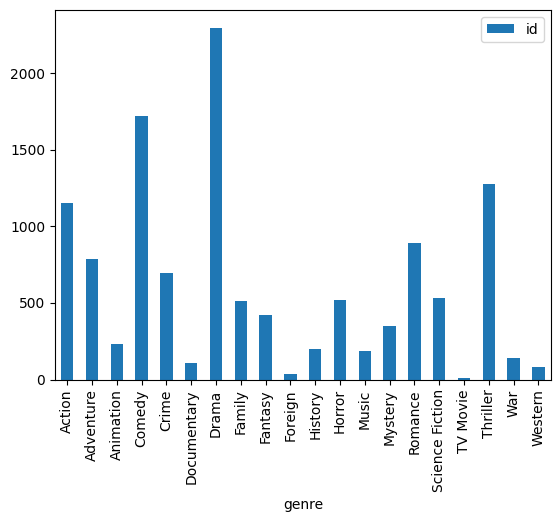

In [23]:
# Use right join to merge the movie_to_genres and pop_movies tables
genres_movies = movies.merge(movie_popularity, how='right',
                                      right_on = 'id',
                                      left_on = 'movie_id')

# Count the number of genres
genre_count = genres_movies.groupby('genre').agg({'id':'count'})

# Plot a bar chart of the genre_count
genre_count.plot(kind='bar')
plt.show()

### Self join
Merging a table to itself can be useful when you want to compare values in a column to other values in the same column.
###In this exercise,
you will practice this by creating a table that for each movie will list the movie director and a member of the crew on one row. You have been given a table called crews, which has columns id, job, and name. First, merge the table to itself using the movie ID. This merge will give you a larger table where for each movie, every job is matched against each other. Then select only those rows with a director in the left table, and avoid having a row where the director's job is listed in both the left and right tables. This filtering will remove job combinations that aren't with the director.

In [24]:
crews = pd.read_pickle('https://raw.githubusercontent.com/nafis-git/data_science_path/main/data/crews.p')

In [25]:
crews_self_merged = crews.merge(crews, on = 'id', suffixes = ['_dir', '_crew'])
crews_self_merged.head()

,id,department_dir,job_dir,name_dir,department_crew,job_crew,name_crew
0,19995,Editing,Editor,Stephen E. Rivkin,Editing,Editor,Stephen E. Rivkin
1,19995,Editing,Editor,Stephen E. Rivkin,Sound,Sound Designer,Christopher Boyes
2,19995,Editing,Editor,Stephen E. Rivkin,Production,Casting,Mali Finn
3,19995,Editing,Editor,Stephen E. Rivkin,Directing,Director,James Cameron
4,19995,Editing,Editor,Stephen E. Rivkin,Writing,Writer,James Cameron


In [27]:
# Create a boolean index to select the appropriate rows
boolean_filter = ((crews_self_merged['job_dir'] == 'Director') &
                  (crews_self_merged['job_crew'] != 'Director'))
direct_crews = crews_self_merged[boolean_filter]

# Print the first few rows of direct_crews
display(direct_crews.head())

,id,department_dir,job_dir,name_dir,department_crew,job_crew,name_crew
156,19995,Directing,Director,James Cameron,Editing,Editor,Stephen E. Rivkin
157,19995,Directing,Director,James Cameron,Sound,Sound Designer,Christopher Boyes
158,19995,Directing,Director,James Cameron,Production,Casting,Mali Finn
160,19995,Directing,Director,James Cameron,Writing,Writer,James Cameron
161,19995,Directing,Director,James Cameron,Art,Set Designer,Richard F. Mays


**Do sequels earn more?**
It is time to put together many of the aspects that you have learned in this chapter. In this exercise, you'll find out which movie sequels earned the most compared to the original movie. To answer this question, you will merge a modified version of the sequels and financials tables where their index is the movie ID. You will need to choose a merge type that will return all of the rows from the sequels table and not all the rows of financials table need to be included in the result. From there, you will join the resulting table to itself so that you can compare the revenue values of the original movie to the sequel. Next, you will calculate the difference between the two revenues and sort the resulting dataset.

In [40]:
sequels = pd.read_pickle('https://raw.githubusercontent.com/nafis-git/data_science_path/main/data/sequels.p')

In [32]:
financials = pd.read_pickle('https://raw.githubusercontent.com/nafis-git/data_science_path/main/data/financials.p')

In [34]:
# Merge sequels and financials on index id
sequels_fin = sequels.merge(financials, on='id', how='left')

In [36]:
sequels_fin.head()

,id,title,sequel,budget,revenue
0,19995,Avatar,<NA>,237000000.0,2.787965e+09
1,862,Toy Story,863,30000000.0,3.735540e+08
2,863,Toy Story 2,10193,90000000.0,4.973669e+08
3,597,Titanic,<NA>,200000000.0,1.845034e+09
4,24428,The Avengers,<NA>,220000000.0,1.519558e+09


In [41]:
# # Self merge with suffixes as inner join with left on sequel and right on id
# orig_seq = sequels_fin.merge(sequels_fin, how='inner', left_on='sequel',
#                              right_on='id', right_index=True,
#                              suffixes=('_org','_seq'))